In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [2]:
n_data = torch.ones(100,2)
x0 = torch.normal(2*n_data,1)
y0 = torch.zeros(100)
# print(x0)
x1 = torch.normal(-2*n_data,1)
y1 = torch.ones(100)


x = torch.cat((x0,x1),0).type(torch.FloatTensor)
y = torch.cat((y0,y1)).type(torch.LongTensor)
# print(y)
x,y = Variable(x),Variable(y)

In [3]:
class Net(torch.nn.Module):
    def __init__(self,n_input,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden1 = torch.nn.Linear(n_input,n_hidden)
        self.hidden2 = torch.nn.Linear(n_hidden,n_hidden)
        self.predict = torch.nn.Linear(n_hidden,n_output)

    def forward(self, input):
        out = self.hidden1(input)
        out = torch.sigmoid(out)
        out = self.hidden2(out)
        out = torch.sigmoid(out)
        out = self.predict(out)
        return out

In [4]:
net = Net(2,20,2)
print(net)

Net(
  (hidden1): Linear(in_features=2, out_features=20, bias=True)
  (hidden2): Linear(in_features=20, out_features=20, bias=True)
  (predict): Linear(in_features=20, out_features=2, bias=True)
)


In [5]:
optimizer = torch.optim.SGD(net.parameters(),lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()

for t in range(100):
    prediction = net(x)
    # print(prediction)
    loss = loss_func(prediction,y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [6]:
prediction

tensor([[0.2985, 0.1467],
        [0.2858, 0.1520],
        [0.2676, 0.1598],
        [0.2602, 0.1705],
        [0.3023, 0.1448],
        [0.3054, 0.1377],
        [0.2832, 0.1593],
        [0.2857, 0.1487],
        [0.2864, 0.1522],
        [0.3068, 0.1358],
        [0.2636, 0.1592],
        [0.2766, 0.1558],
        [0.3127, 0.1449],
        [0.2634, 0.1591],
        [0.2775, 0.1540],
        [0.2536, 0.1701],
        [0.2615, 0.1732],
        [0.2908, 0.1496],
        [0.2962, 0.1391],
        [0.3037, 0.1476],
        [0.2725, 0.1602],
        [0.2963, 0.1505],
        [0.2920, 0.1530],
        [0.2989, 0.1439],
        [0.2671, 0.1621],
        [0.2602, 0.1733],
        [0.2996, 0.1378],
        [0.2422, 0.1824],
        [0.2803, 0.1607],
        [0.2992, 0.1468],
        [0.3009, 0.1366],
        [0.2666, 0.1647],
        [0.2819, 0.1548],
        [0.2869, 0.1463],
        [0.2917, 0.1489],
        [0.3043, 0.1392],
        [0.2541, 0.1730],
        [0.2569, 0.1693],
        [0.3

In [7]:
y

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1])

Net(
  (hidden1): Linear(in_features=2, out_features=20, bias=True)
  (hidden2): Linear(in_features=20, out_features=20, bias=True)
  (predict): Linear(in_features=20, out_features=2, bias=True)
)


/home/shuyu/anaconda3/envs/cs315/lib/python3.6/site-packages/ipykernel_launcher.py:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


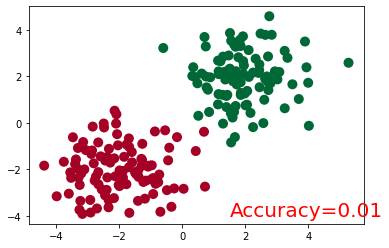

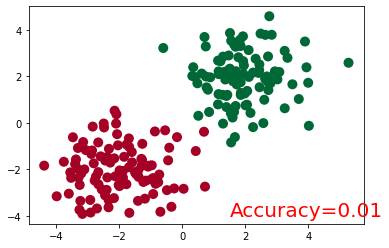

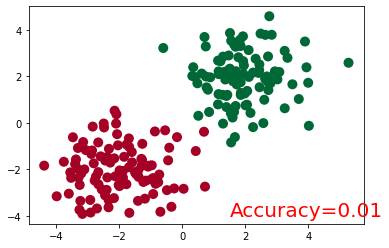

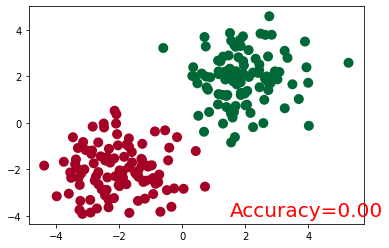

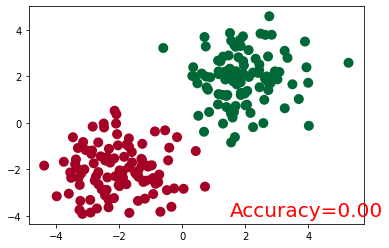

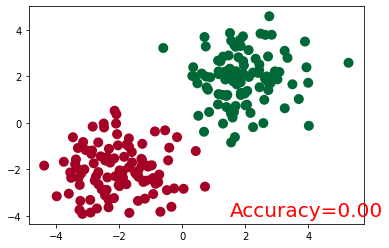

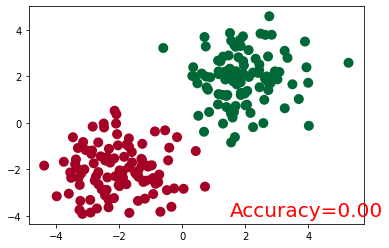

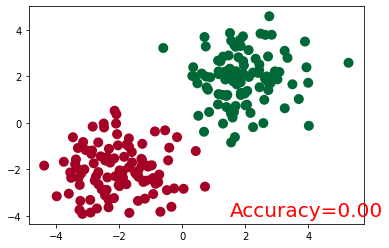

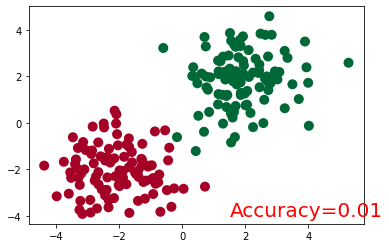

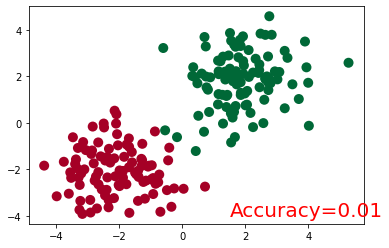

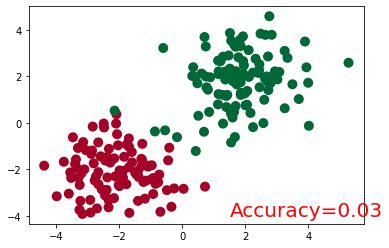

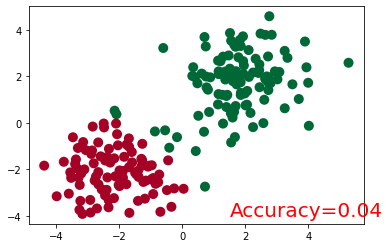

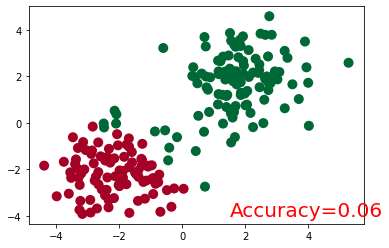

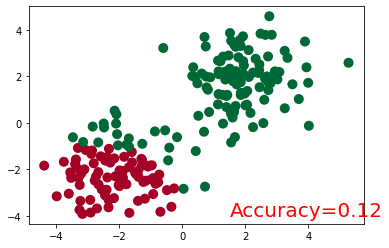

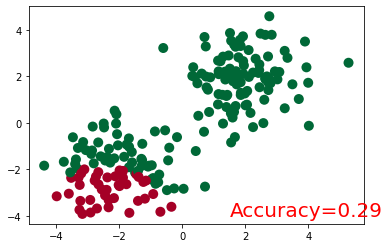

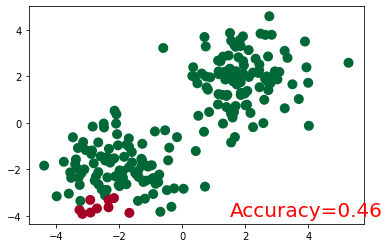

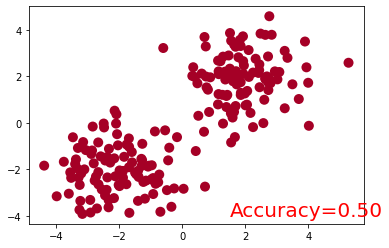

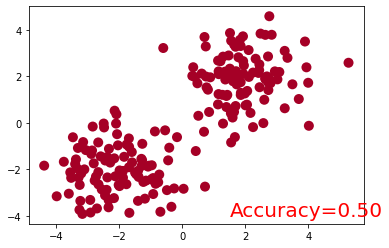

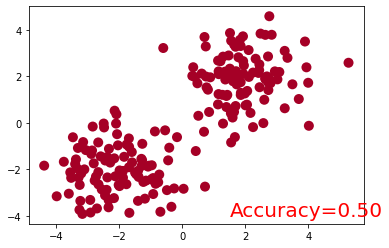

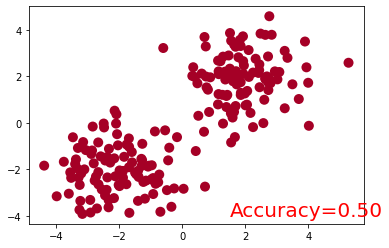

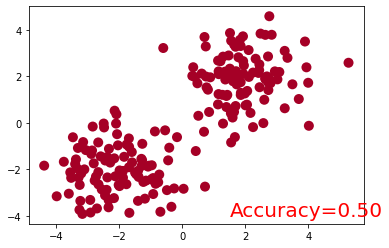

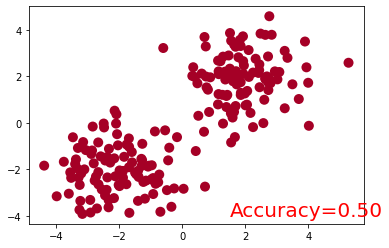

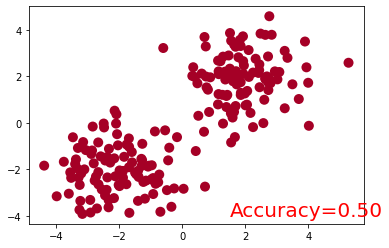

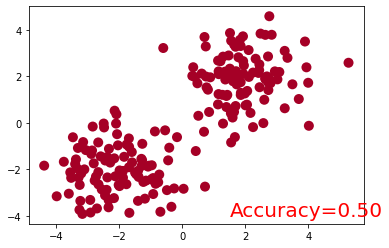

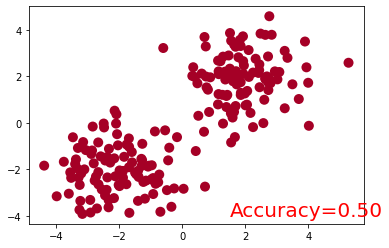

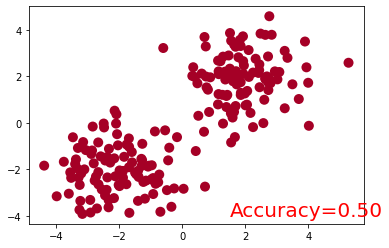

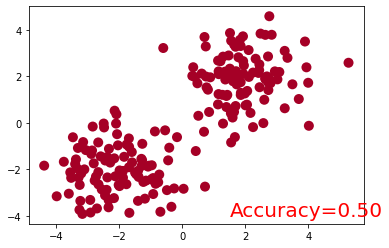

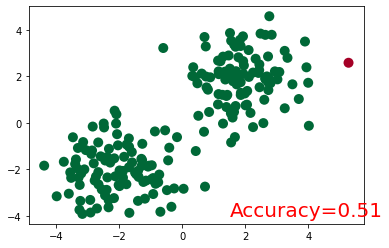

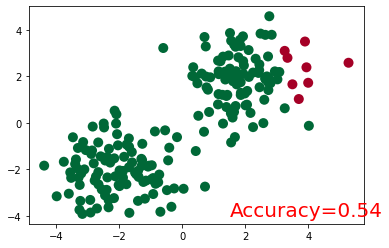

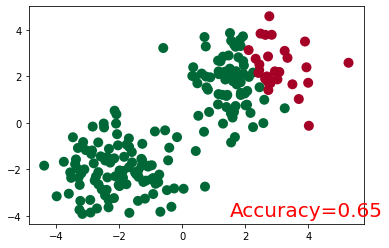

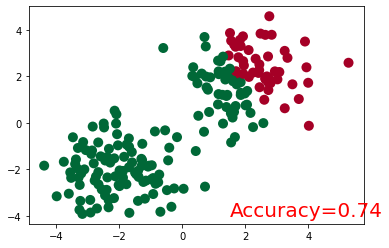

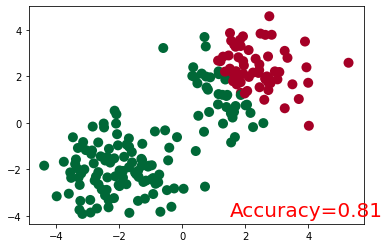

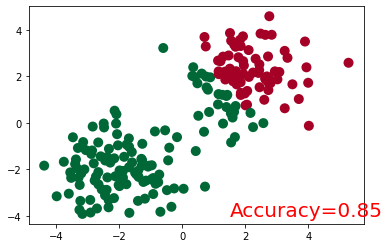

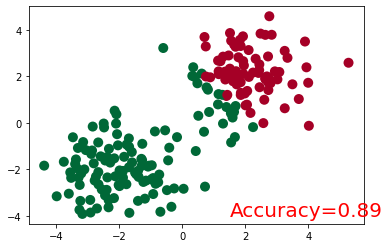

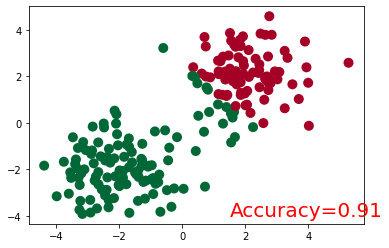

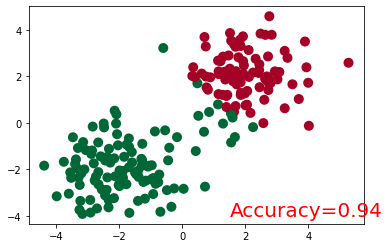

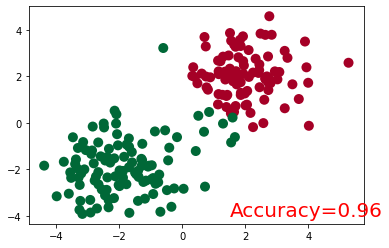

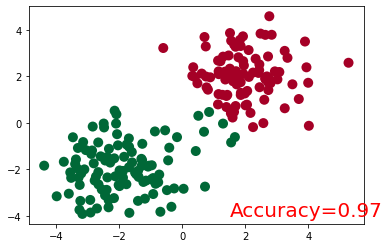

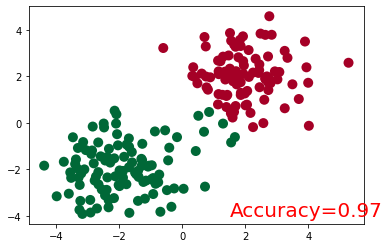

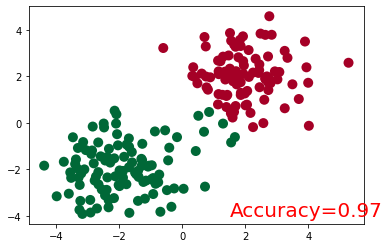

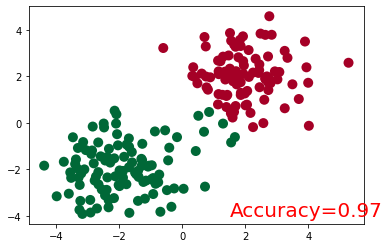

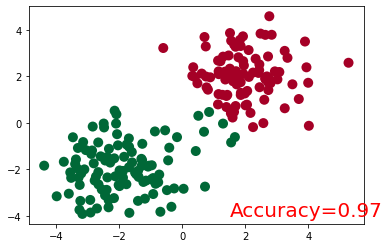

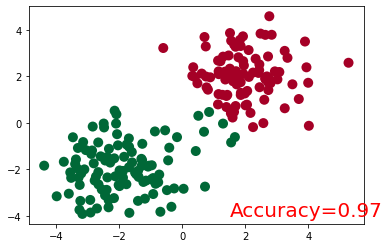

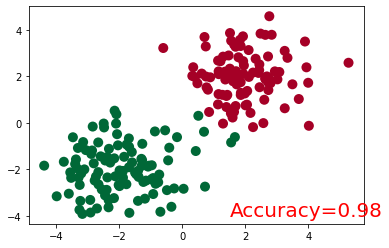

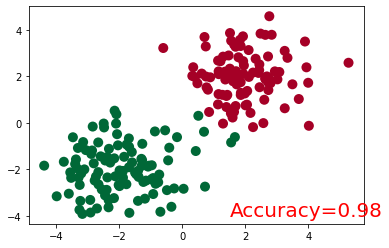

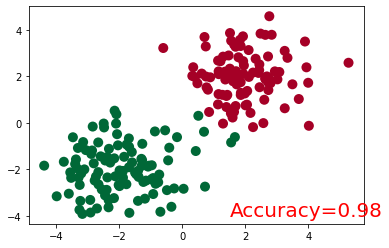

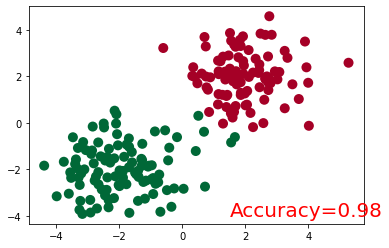

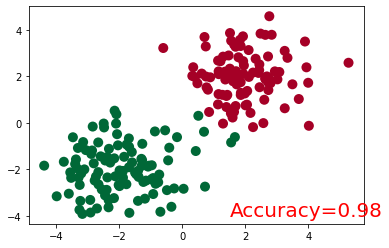

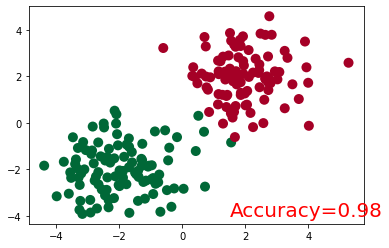

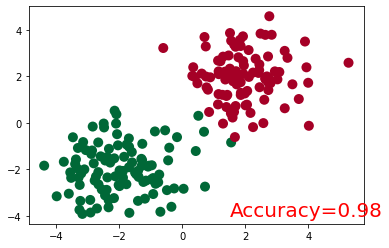

In [9]:
import torch
import numpy as np
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

n_data = torch.ones(100,2)
x0 = torch.normal(2*n_data,1)
y0 = torch.zeros(100)
# print(x0)
x1 = torch.normal(-2*n_data,1)
y1 = torch.ones(100)


x = torch.cat((x0,x1),0).type(torch.FloatTensor)
y = torch.cat((y0,y1)).type(torch.LongTensor)
# print(y)
x,y = Variable(x),Variable(y)

# plt.scatter(x[:,0],x[:,1],c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
# plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
# plt.show()

class Net(torch.nn.Module):
    def __init__(self,n_input,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden1 = torch.nn.Linear(n_input,n_hidden)
        self.hidden2 = torch.nn.Linear(n_hidden,n_hidden)
        self.predict = torch.nn.Linear(n_hidden,n_output)

    def forward(self, input):
        out = self.hidden1(input)
        out = torch.sigmoid(out)
        out = self.hidden2(out)
        out = torch.sigmoid(out)
        out = self.predict(out)
        # out = F.softmax(out)
        return out

net = Net(2,20,2)
print(net)

optimizer = torch.optim.SGD(net.parameters(),lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()

plt.ion()
plt.show()

for t in range(100):
    out = net(x)
    # print(prediction)
    loss = loss_func(out,y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if t%2==0:
        plt.cla()
        # 过了一道 softmax 的激励函数后的最大概率才是预测值
        # print(F.softmax(prediction))
        prediction = torch.max(F.softmax(out),1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y) / 200.  # 预测中有多少和真实值一样
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)

plt.ioff()  # 停止画图
plt.show()